In [1]:
##   Load Packages
using BayesianNonparametricStatistics, Plots
using Statistics, Distributions
using DelimitedFiles, Plots, LaTeXStrings
using NBInclude, LinearAlgebra, SparseArrays
##   Colors
lblue = RGBA(83/255, 201/255, 250/255,0.7)
dblue = RGBA(47/255, 122/255, 154/255,0.7)

In [2]:
##   Defining a drift function

#drift function described in section 4 equation (13)
#in van der Meulen, Schauer & Van Zanten 2014
function drift_a(x)
    if  0<=x<2/3
        return 2/7-x-2/7*(1-3*x)*sqrt(abs(1-3*x))
    end
    if  2/3<=x<=1
        return -2/7+2/7*x
    end
end

function drift_b(x)
    #note the mod(x,1)
    #this makes the function 1 periodic
    return 12*(drift_a(mod(x,1))+0.05)
end


##   Simmulating from the SDE

# implement SDE dX_t = drift_b(X_t)dt + dW_t, 
# starting at zero till time 200.0, discretised 
# with precision 0.01.
model_sim = SDEModel(1.0,0.0,200.0,10^-2)

##   Define SDE
sde = SDE(drift_b,model_sim)

# x values [0,1]
xs = range(0,1,length = 500)
posterior_plot = plot()


path_plot = plot()
##   Direct Computation

##   Model
σ = 1.0 #diffusion
beginvalue = 0.0 #starting value
endtime = 200.0 #end time T
Δ = 200.0/20000 #increment delta

model = SDEModel(σ, beginvalue , endtime ,  Δ)

##   Prior

# number of terms in the series
# sum_k=1^J s*k^-2*Z_k*phi_k
J = 200


# distribution of theta in
# sum_j theta_j*phi_j
s = pi
distribution = GaussianVector(diagm([(s*0.5)*k^(-2) for k in 1.0:(J+1)]))

# Basis functions
# Fourier
Π = GaussianProcess(vcat([x ->1.0] , [fourier(k) for k in 1:J]), distribution)
0.0

0.0

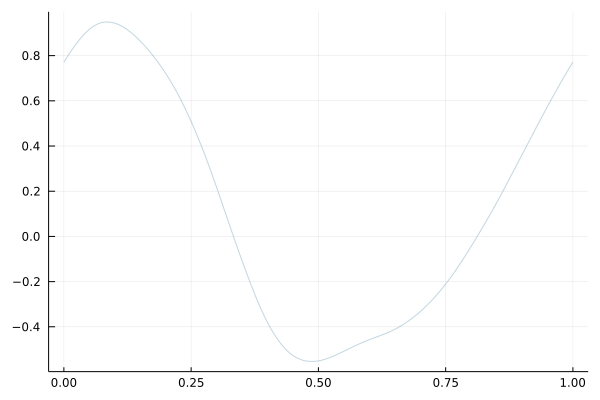

In [3]:
x_sim = rand(sde)

postΠ = calculateposterior(Π, x_sim, model)

post_drift_bayes = mean(postΠ)

plot!(posterior_plot, 
        xs, post_drift_bayes.(xs), 
        linewidth = 1,
        linecolor = dblue,
        legend = nothing,
        linealpha = 0.3)

In [5]:
try
    png(posterior_plot, "/figures/test")
catch e
end

In [3]:
for i in 1:200
    print(i, "\r")
    ##   Sample from SDE
    x_sim = rand(sde)

    ##   Posterior

    # distribution
    postΠ = calculateposterior(Π, x_sim, model)

    # posterior mean
    post_drift_bayes = mean(postΠ)

    ##   Plot
    # plot posterior mean
    plot!(posterior_plot, 
        xs, post_drift_bayes.(xs), 
        linewidth = 1,
        linecolor = dblue,
        legend = nothing,
        linealpha = 0.3)
    
    plot!(path_plot,
    x_sim.timeinterval, x_sim.samplevalues, 
    legend = false,
    linecolor = dblue,
    linealpha = 0.3)
end

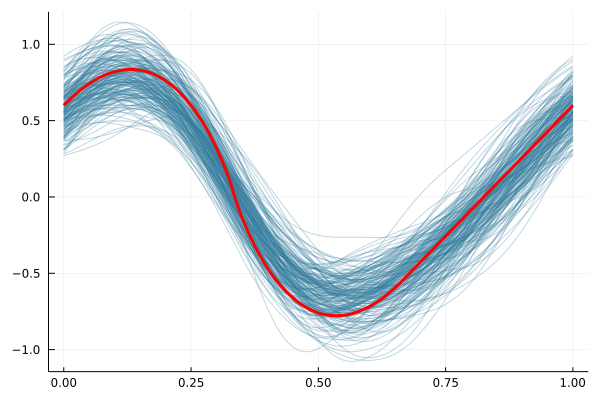

In [4]:
plot!(posterior_plot,
    xs, drift_b.(xs),
    linewidth = 3,
    linecolor = :red)

In [5]:
png(posterior_plot, "figures\\Multiple_Sims_post")
png(path_plot, "figures\\Multiple_Sims_path")

LoadError: UndefVarError: path not defined